In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats  as stats

In [5]:
divorce_df = pd.read_csv(r'C:\Users\AKSHAT ANAND\Desktop\marriage\divorce.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)
pd.to_numeric(divorce_df.index.values)

array([1960, 1970, 1980, 1990, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012], dtype=int64)

In [10]:
men_df = pd.read_csv(r'C:\Users\AKSHAT ANAND\Desktop\marriage\men.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)

In [13]:
women_df = pd.read_csv(r'C:\Users\AKSHAT ANAND\Desktop\marriage\women.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)


In [15]:
both_sexes_df = pd.read_csv(r'C:\Users\AKSHAT ANAND\Desktop\marriage\both_sexes.csv', index_col=1).drop(['Unnamed: 0', 'date'], 1)


In [17]:
#To save us multiple calls. Each dataset was measured in the exact same set of years. This array
#of year values will be the x-axis argument for many plots.'''
years_tracked = both_sexes_df.index.values

In [24]:
'''Plots marriage rates across time. 
DF is the dataframe we're pulling data from over time 
KEYS are the key values we're plotting. Each corresponds to a line on the plot.
LABELS are the labels for each key in the legend. Must be the same size as KEYS.
FLIP VALUES is a boolean which is true iff we want to plot 1-df[key] instead of df[key]
TITLE 
'''
def plot_marriagerate_over_time(df, keys, labels, title, flip_values): 
    fig = plt.figure(figsize=[18, 12])
    ax = plt.subplot()
    for i in range(len(keys)): 
        print('plotting for ' + keys[i])
        if (flip_values): 
            ax.plot(years_tracked, 1 - df[keys[i]], label=labels[i])
        else:
            ax.plot(years_tracked, df[keys[i]], label=labels[i])
    ax.set_title(title, fontsize=60)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Year', fontsize=40)
    ax.set_ylabel('Marriage Rate', fontsize=40)
    ax.tick_params(labelsize=30)
    ax.legend(fontsize=30)
    fig.show()

In [25]:
    
'''Assumes we\'re plotting the exact same values for both men and women
'''
def plot_marriagerate_menwomen(keys, labels, title, flip_values): 
    fig = plt.figure(figsize=[18, 12])
    ax = plt.subplot()
    for i in range(len(keys)): 
        if (flip_values): 
            ax.plot(years_tracked, 1 - men_df[keys[i]], label='Men ' + labels[i])
            ax.plot(years_tracked, 1 - women_df[keys[i]], label='Women ' + labels[i])
        else:
            ax.plot(years_tracked, men_df[keys[i]], label='Men ' + labels[i])
            ax.plot(years_tracked, women_df[keys[i]], label='Women ' + labels[i])
    ax.set_title(title, fontsize=60)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Year', fontsize=40)
    ax.set_ylabel('Marriage Rate', fontsize=40)
    ax.tick_params(labelsize=30)
    ax.legend(fontsize=30)
    fig.show()

Marriage Rates Over Time
While marriage rates have declined overall, 25-34 year olds account for an outsize share of this decline. They're marrying later in life.

plotting for all_2534
plotting for all_3544
plotting for all_4554


C:\Users\AKSHAT ANAND\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


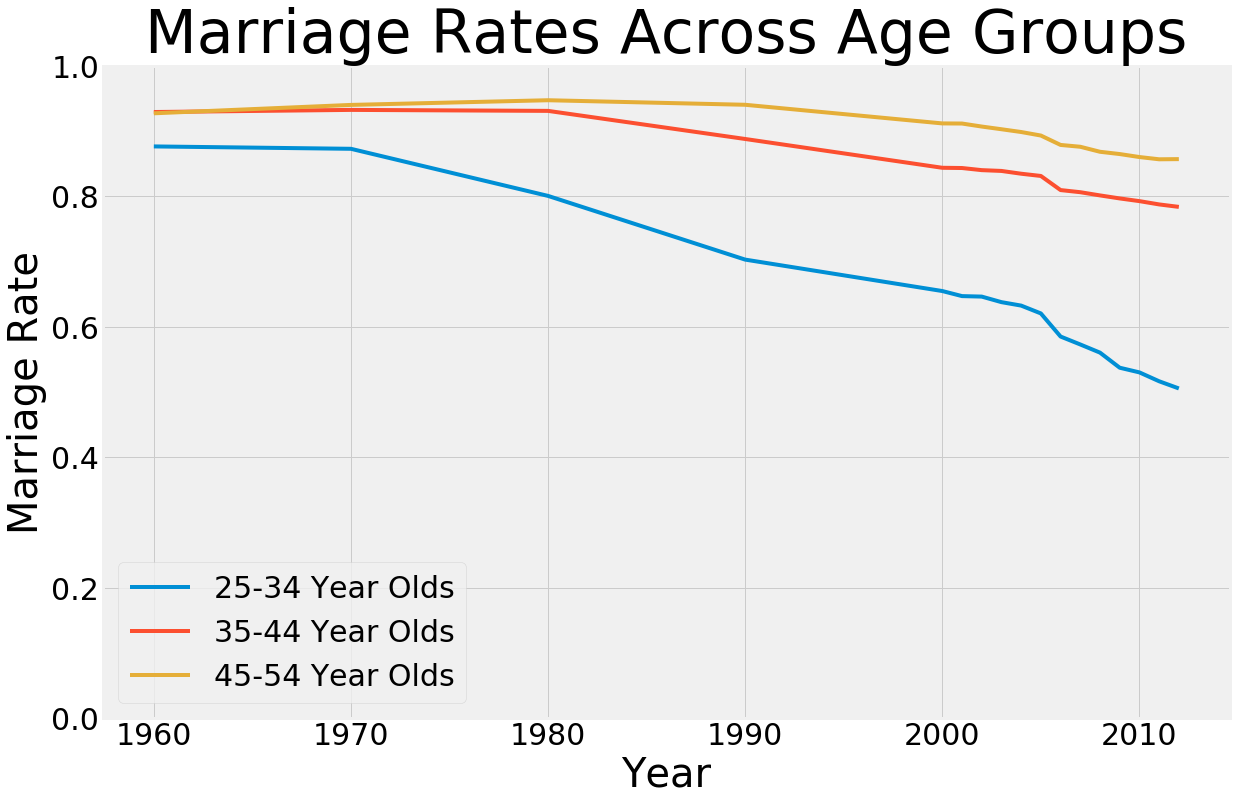

In [21]:
plot_marriagerate_over_time(
    both_sexes_df, ['all_2534', 'all_3544', 'all_4554'], 
    ['25-34 Year Olds', '35-44 Year Olds', '45-54 Year Olds'], 'Marriage Rates Across Age Groups', True)

<B>Marriage Rates Over Time and Race</B>
Interestingly, white and hispanic rates closely track one another while blacks' marriage rates decline really harshly.

plotting for White_2534
plotting for Black_2534
plotting for Hisp_2534
plotting for HS_2534
plotting for SC_2534
plotting for BAp_2534


C:\Users\AKSHAT ANAND\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


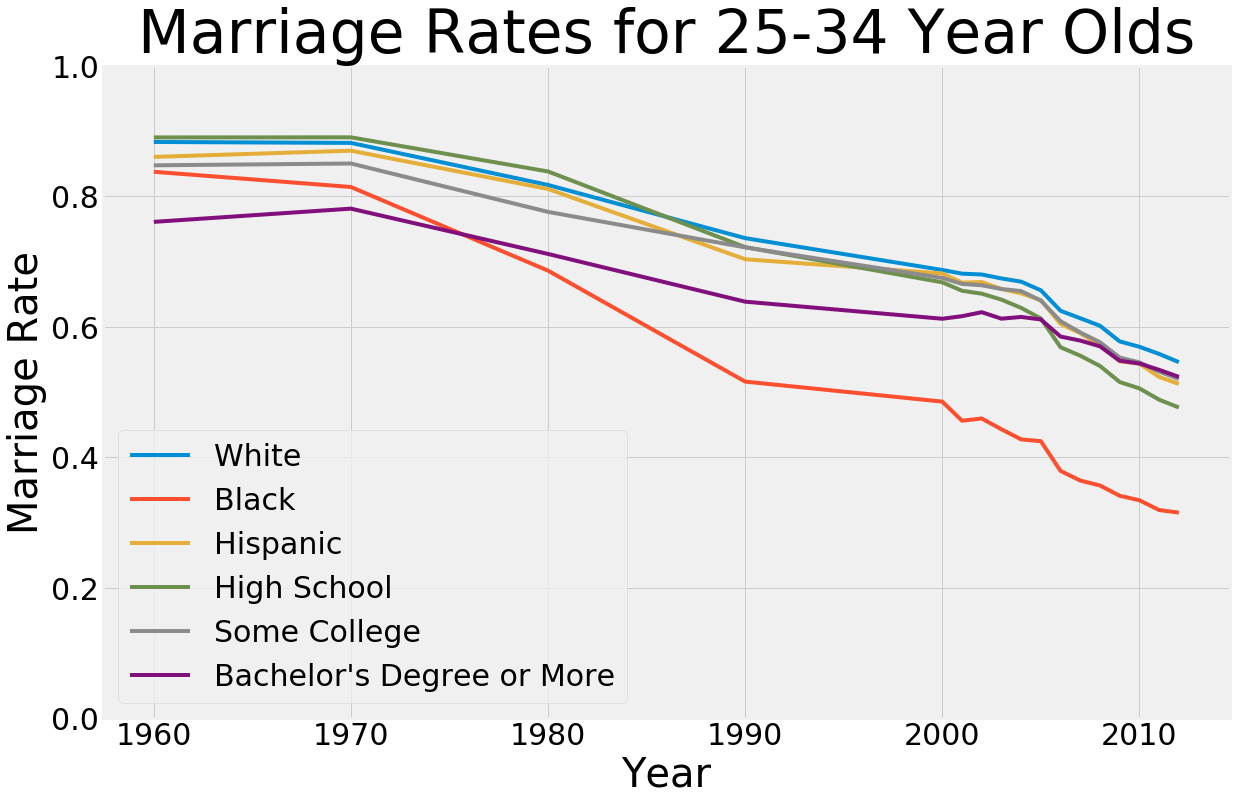

In [22]:
plot_marriagerate_over_time(
    both_sexes_df, ['White_2534', 'Black_2534', 'Hisp_2534', 'HS_2534', 'SC_2534', 'BAp_2534'], 
    ['White', 'Black', 'Hispanic', 'High School', 'Some College', 'Bachelor\'s Degree or More'], 
     'Marriage Rates for 25-34 Year Olds', True)


<B>Marriage Rates Across Education</B>
Seems like there are some differences when people are young. But perhaps when older that's no longer the case.

plotting for HS_2534
plotting for SC_2534
plotting for BAp_2534
plotting for HS_3544
plotting for SC_3544
plotting for BAp_3544


C:\Users\AKSHAT ANAND\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


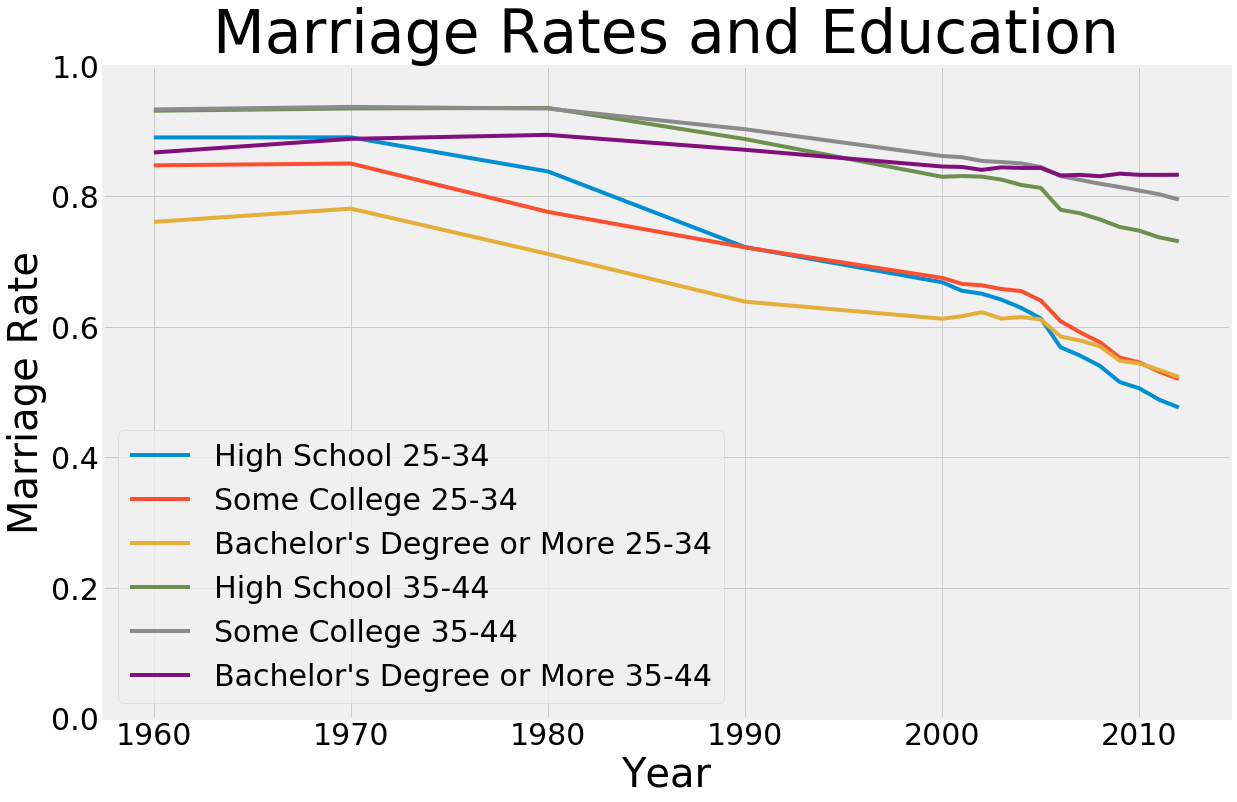

In [26]:
plot_marriagerate_over_time(
    both_sexes_df, ['HS_2534', 'SC_2534', 'BAp_2534', 'HS_3544', 'SC_3544', 'BAp_3544'], 
    ['High School 25-34', 'Some College 25-34', 'Bachelor\'s Degree or More 25-34',
    'High School 35-44', 'Some College 35-44', 'Bachelor\'s Degree or More 35-44'], 
     'Marriage Rates and Education', True)

<B>Employment vs Marriage?</B>
Interestingly, women who don't work are most likely to be married, while men who don't work are least likely to be married.

C:\Users\AKSHAT ANAND\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


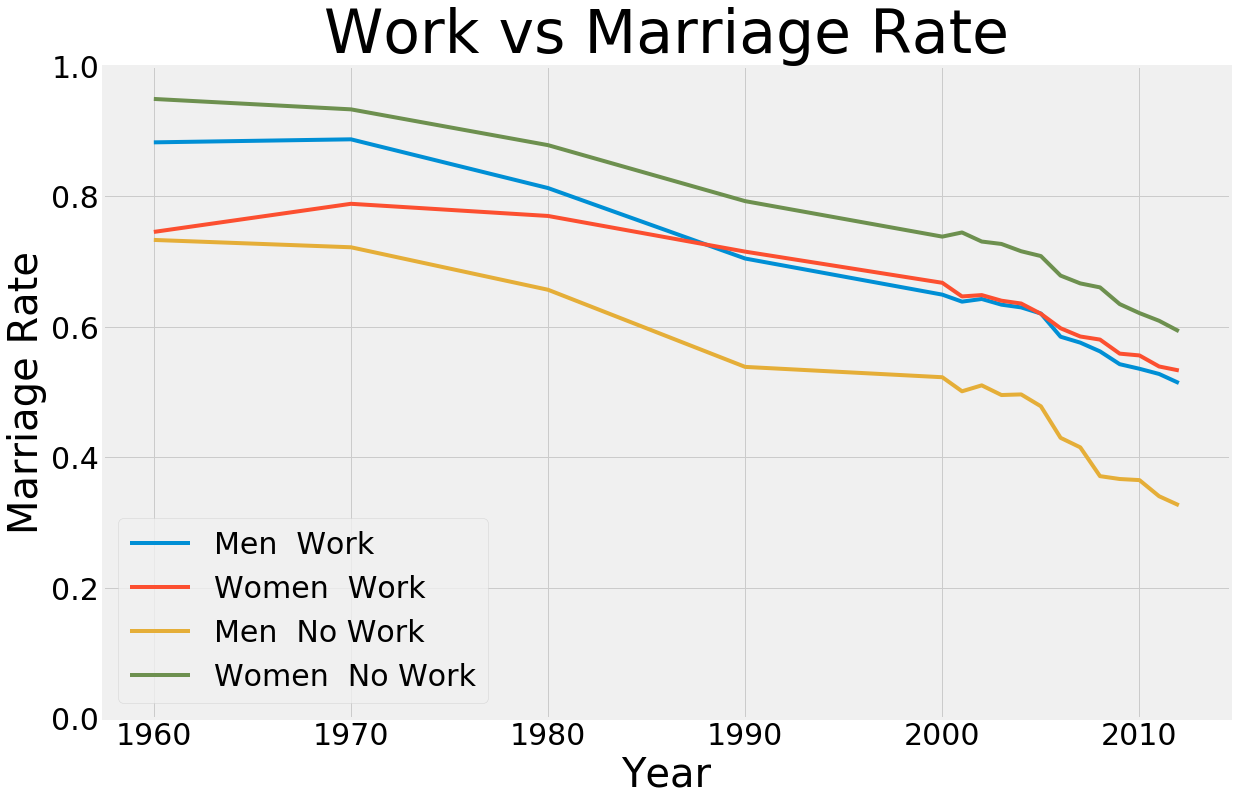

In [27]:

plot_marriagerate_menwomen(['work_2534', 'nowork_2534'], [' Work', ' No Work'], 'Work vs Marriage Rate', True)

C:\Users\AKSHAT ANAND\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


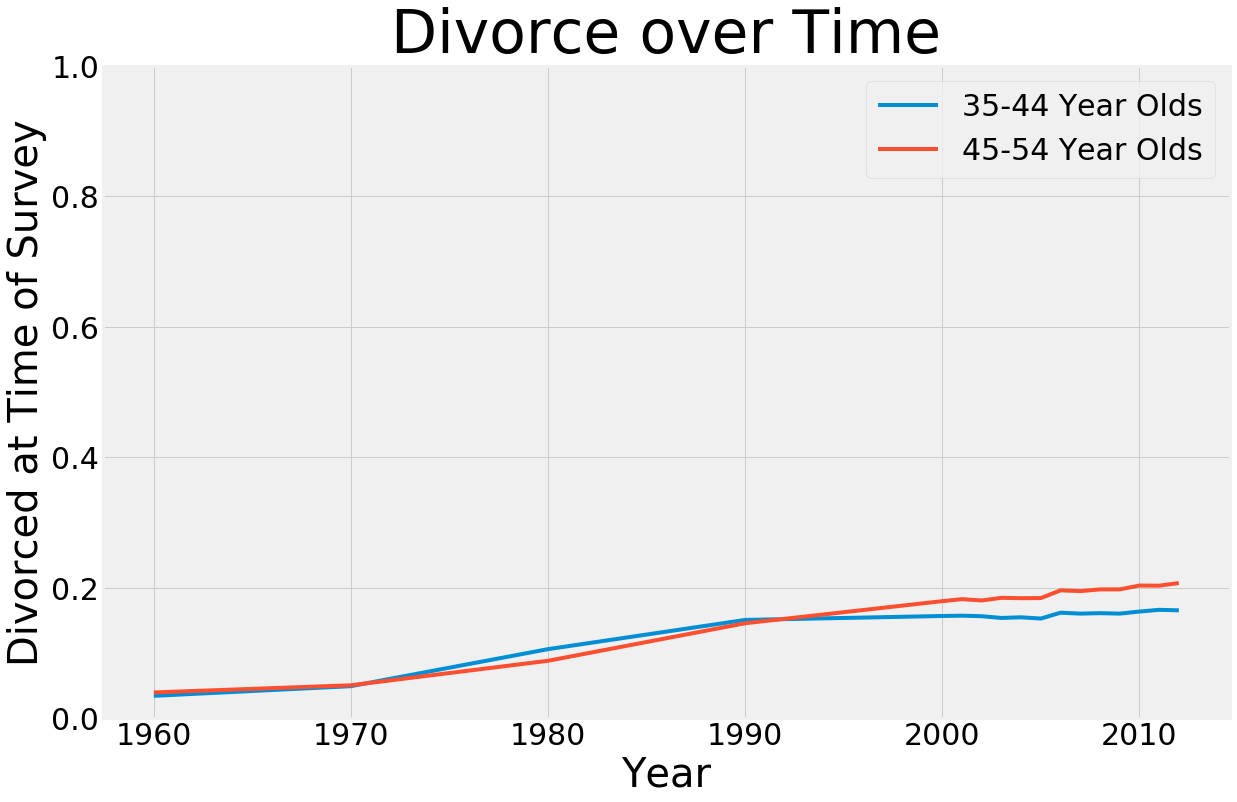

In [29]:
def plot_divorce_over_time(keys, labels, title, flip_values): 
    fig = plt.figure(figsize=[18, 12])
    ax = plt.subplot()
    for i in range(len(keys)):  
        if (flip_values): 
            ax.plot(years_tracked, 1 - divorce_df[keys[i]], label=labels[i])
        else:
            ax.plot(years_tracked, divorce_df[keys[i]], label=labels[i])
    ax.set_title(title, fontsize=60)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Year', fontsize=40)
    ax.set_ylabel('Divorced at Time of Survey', fontsize=40)
    ax.tick_params(labelsize=30)
    ax.legend(fontsize=30)
    fig.show()
    
plot_divorce_over_time(['all_3544', 'all_4554'], ['35-44 Year Olds', '45-54 Year Olds'], 'Divorce over Time', False)

<B>25-34 Year Old Men</B>

C:\Users\AKSHAT ANAND\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


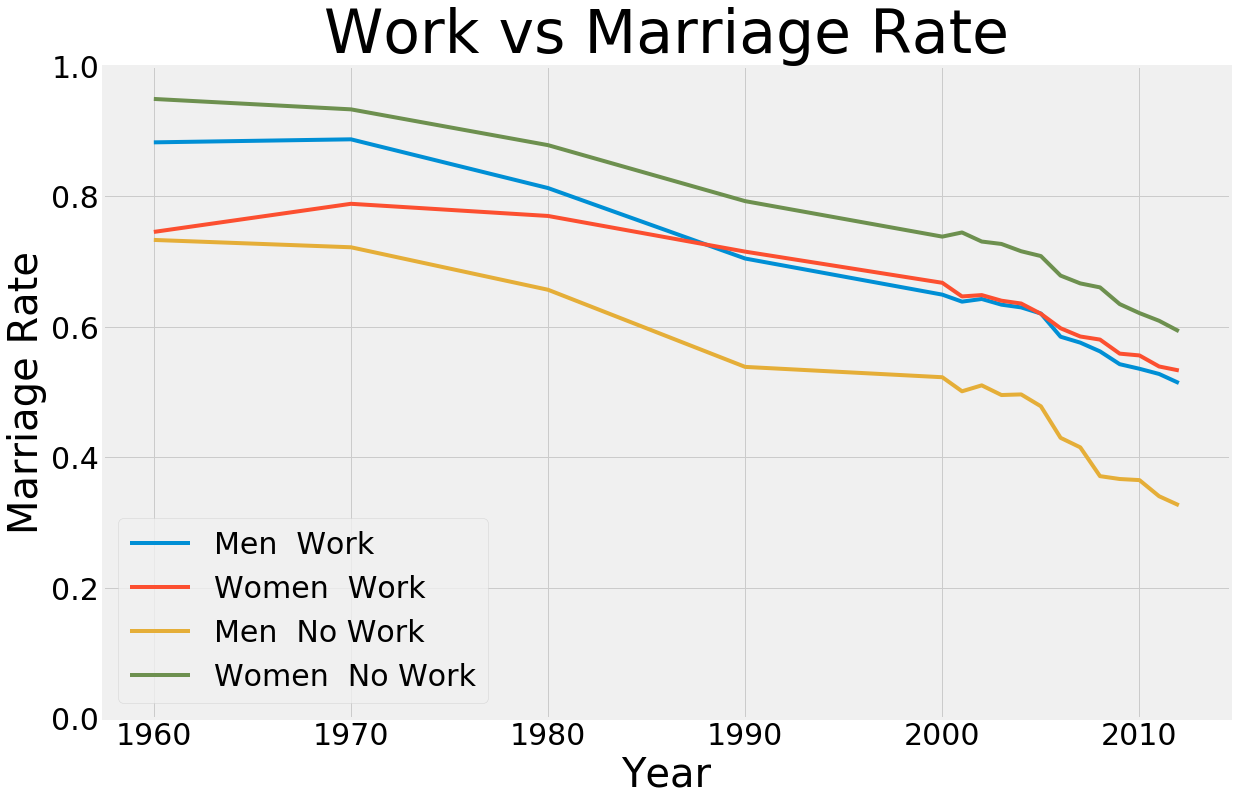

In [31]:
plot_marriagerate_menwomen(['work_2534', 'nowork_2534'], [' Work', ' No Work'], 'Work vs Marriage Rate', True)

plotting for work_HS_2534
plotting for work_SC_2534
plotting for work_BAo_2534
plotting for work_GD_2534


C:\Users\AKSHAT ANAND\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


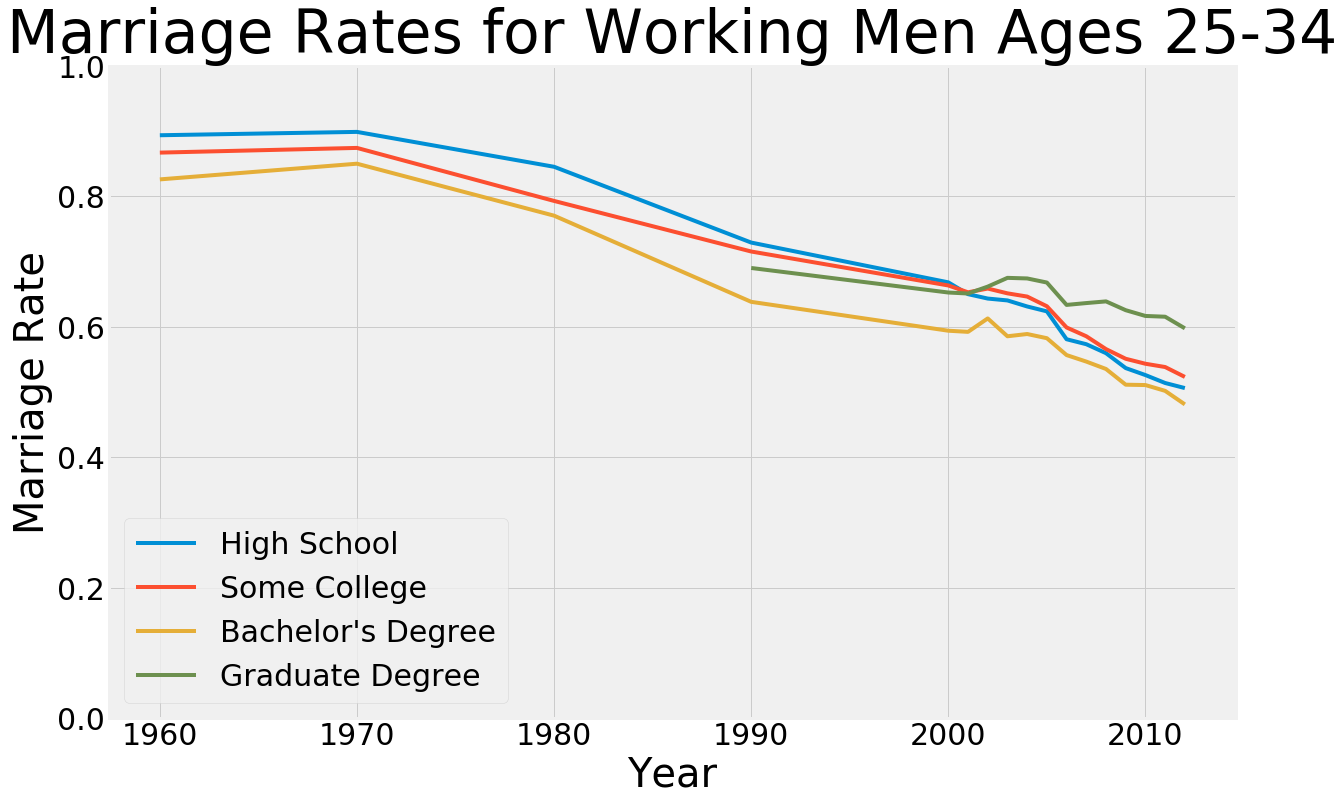

In [32]:
plot_marriagerate_over_time(
    men_df, ['work_HS_2534', 'work_SC_2534', 'work_BAo_2534', 'work_GD_2534'], 
    ['High School', 'Some College', 'Bachelor\'s Degree', 'Graduate Degree'],
     'Marriage Rates for Working Men Ages 25-34', True)

plotting for nowork_HS_2534
plotting for nowork_SC_2534
plotting for nowork_BAo_2534
plotting for nowork_GD_2534


C:\Users\AKSHAT ANAND\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


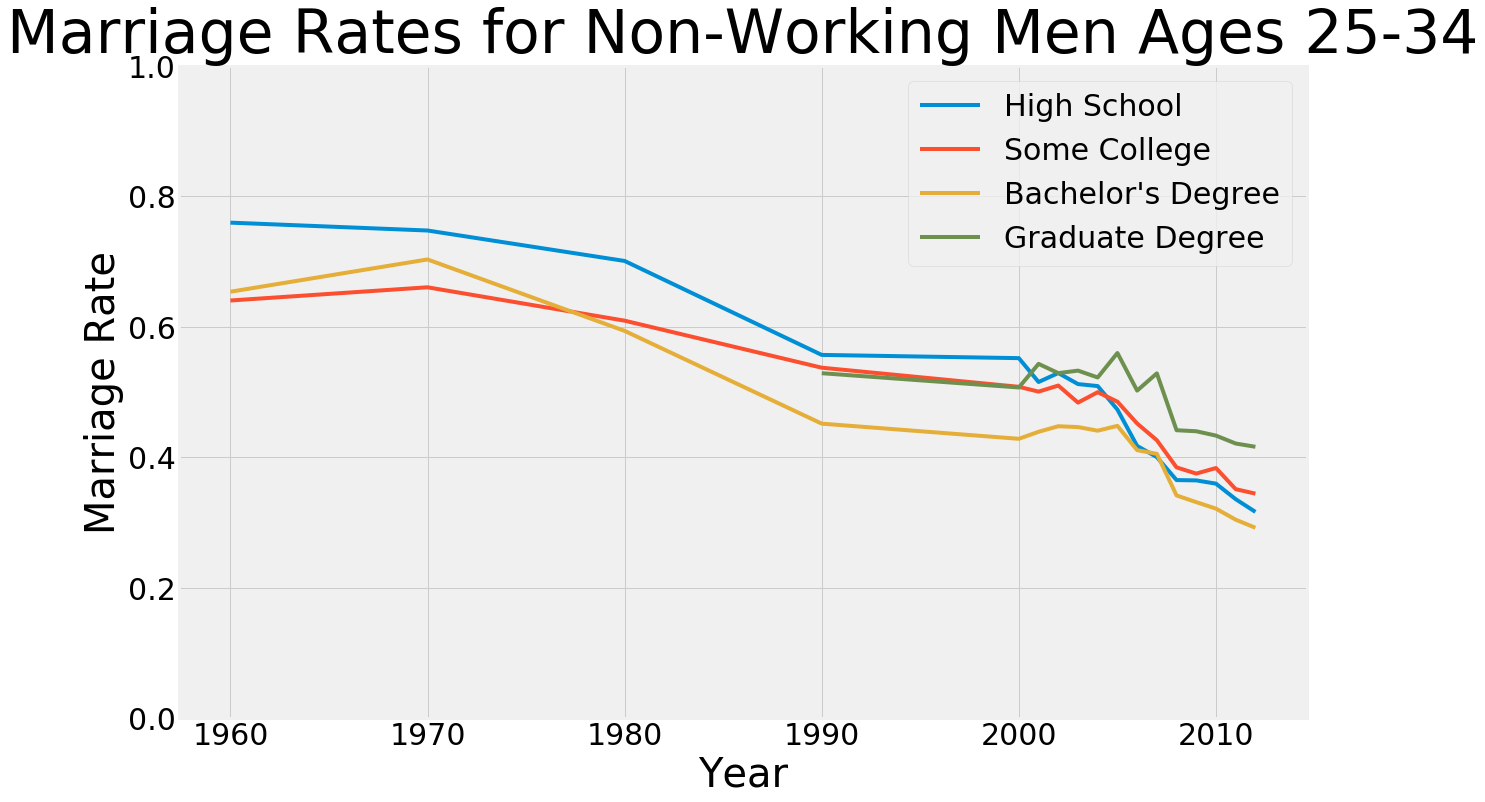

In [33]:
plot_marriagerate_over_time(
    men_df, ['nowork_HS_2534', 'nowork_SC_2534', 'nowork_BAo_2534', 'nowork_GD_2534'], 
    ['High School', 'Some College', 'Bachelor\'s Degree', 'Graduate Degree'],
     'Marriage Rates for Non-Working Men Ages 25-34', True)

plotting for work_HS_2534
plotting for work_SC_2534
plotting for work_BAo_2534
plotting for work_GD_2534
plotting for nowork_HS_2534
plotting for nowork_SC_2534
plotting for nowork_BAo_2534
plotting for nowork_GD_2534


C:\Users\AKSHAT ANAND\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


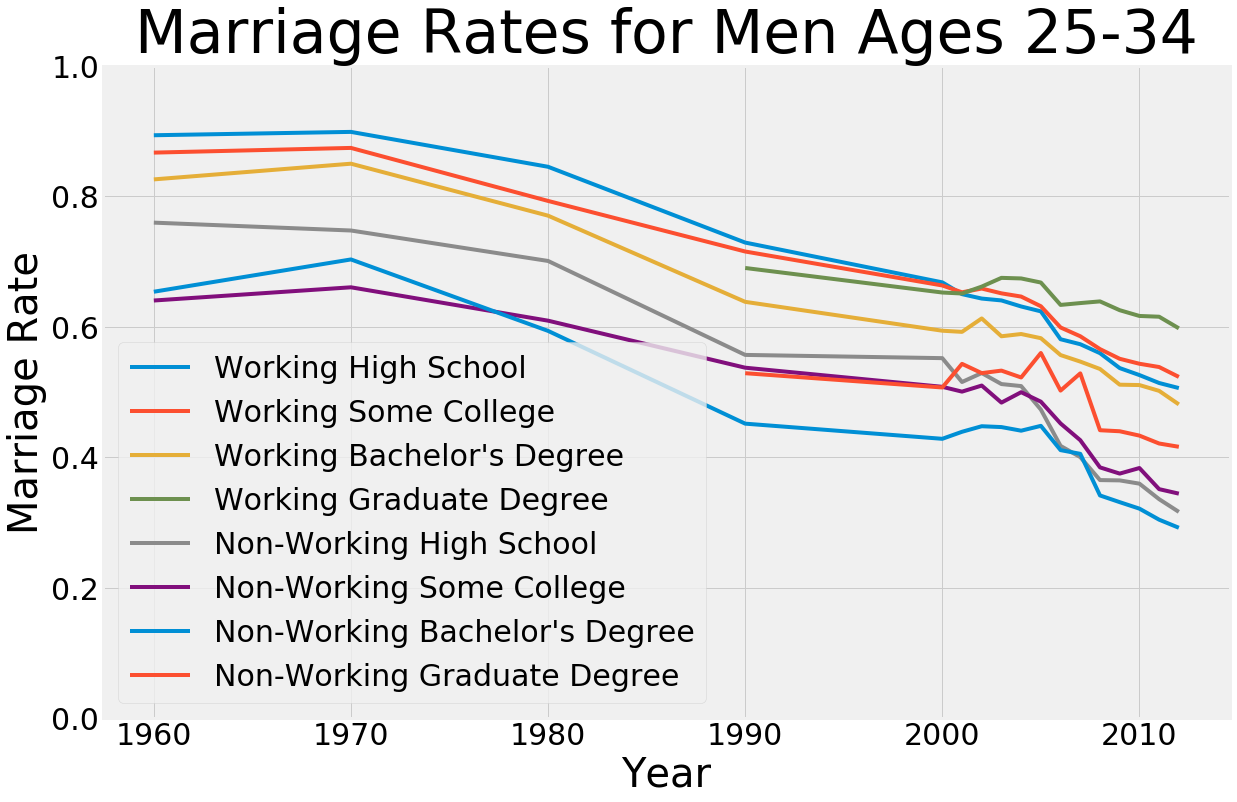

In [34]:
plot_marriagerate_over_time(
    men_df, ['work_HS_2534', 'work_SC_2534', 'work_BAo_2534', 'work_GD_2534', 
             'nowork_HS_2534', 'nowork_SC_2534', 'nowork_BAo_2534', 'nowork_GD_2534'], 
    ['Working High School', 'Working Some College', 'Working Bachelor\'s Degree', 'Working Graduate Degree', 
    'Non-Working High School', 'Non-Working Some College', 'Non-Working Bachelor\'s Degree', 'Non-Working Graduate Degree'],
     'Marriage Rates for Men Ages 25-34', True)